# Erd&ouml;s-R&eacute;nyi (ER) Random Networks

We will start our description with the simplest random network model. Consider a social network, with $50$ students. Our network will have $50$ nodes, where each node represents a single student in the network. Edges in the social network represent whether or not a pair of students are friends. What is the simplest way we could describe whether two people are friends?

In this case, we have a yes or no question: are a pair of people friends, or are they not friends? In this case, the simplest possible thing to do would be to say, for any two students in our network, there is some probability (which we will call $p$) that describes how likely they are to be friends. In the below example, for the sake of argument, we will let $p=0.3$. What does a realization from this network look like?

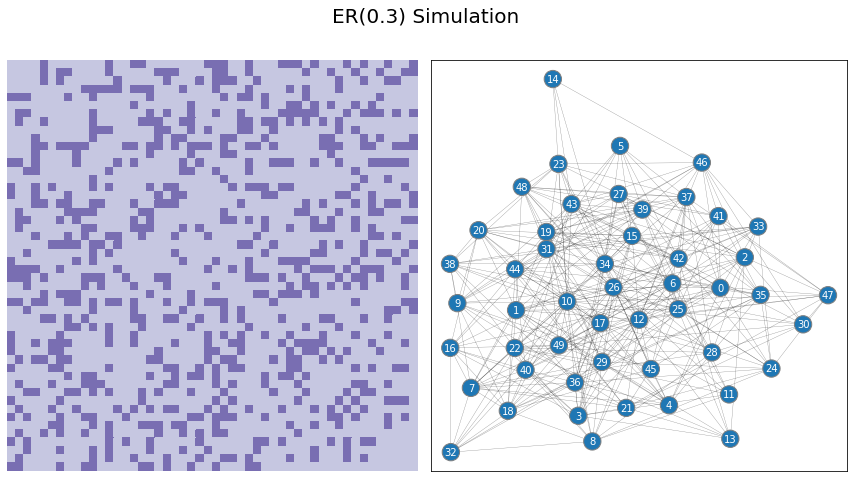

In [2]:
from graphbook_code import draw_multiplot
from graspologic.simulations import er_np

n = 50  # network with 50 nodes
p = 0.3  # probability of an edge existing is .3

# sample a single simple adjacency matrix from ER(50, .3)
A = er_np(n=n, p=p, directed=False, loops=False)

draw_multiplot(A, title="ER(0.3) Simulation");

Using this example, now let's get down to business. This simple random network model is called the Erd&ouml;s R&eacute;nyi (ER) model<sup>1</sup>. The Erd&ouml;s R&eacute;nyi model formalizes this relatively simple situation with a single parameter and an $iid$ assumption:

| Parameter | Space | Description |
| --- | --- | --- |
| $p$ | $[0, 1]$ | Probability that an edge exists between a pair of nodes, which is identical for all pairs of nodes |

From here on out, when we talk about an Erd&ouml;s R&eacute;nyi random variable, we will simply call it an ER network. In an ER network, each pair of nodes is connected with probability $p$, and therefore not connected with probability $1-p$. Statistically, we say that for each edge $\mathbf{a}_{ij}$ for every pair of nodes where $j > i$ (in terms of the adjacency matrix, this means all of the edges in the *upper right* triangle), that $\mathbf{a}_{ij}$ is sampled independently and identically from a *Bernoulli* distribution with probability $p$. The word "independent" means that edges in the network occurring or not occurring do not affect one another. For instance, this means that if we knew a student named Alice was friends with Bob, and Alice was also friends with Chadwick, that we do not learn any information about whether Bob is friends with Chadwick. The word "identical" means that every edge in the network has the same probability $p$ of being connected. If Alice and Bob are friends with probability $p$, then Alice and Chadwick are friends with probability $p$, too. We assume here that the networks are undirected, which means that if an edge $\mathbf a_{ij}$ exists from node $i$ to $j$, then the edge $\mathbf a_{ji}$ also exists from node $j$ to node $i$. We also assume that the networks are loopless, which means that no edges $\mathbf a_{ii}$ can go from node $i$ to itself. If $\mathbf A$ is the adjacency matrix for an ER network with probability $p$, we write that $\mathbf A \sim ER_n(p)$.

## Practical Utility

In practice, the ER model seems like it might be a little too simple to be useful. Why would it ever be useful to think that the best we can do to describe our network is to say that connections exist with some probability? Does this miss a *lot* of useful questions we might want to answer? Fortunately, there are a number of ways in which the simplicity of the ER model is useful. Given a probability and a number of nodes, we can easily describe the properties we would expect to see in a network if that network were ER. For instance, we know how many edges on average the nodes of an ER nework should have. We can reverse this idea, too: given a network we think might *not* be ER, we could check whether it's different in some way from a network which is ER. For instance, if we see that half the nodes have a ton of edges (meaning, they have a high degree), and half don't, we should probably use a more complicated model than an Erdos-Renyi. If this is the case, we might look for other models that could describe our network which are more complex.


```{admonition} Working Out the Expected Degree in an Erd&ouml;s-R&eacute;nyi Network
Suppose that $\mathbf A$ is a simple network which is random. The network has $n$ nodes $\mathcal V = (v_i)_{i = 1}^n$. Recall that the in a simple network, the node degree is $deg(v_i) = \sum_{j = 1}^n \mathbf a_{ij}$. What is the expected degree of a node $v_i$ of a random network $\mathbf A$ which is Erd&ouml;s-R&eacute;nyi?

To describe this, we will compute the expectated value of the degree $deg(v_i)$, written $\mathbb E\left[deg(v_i)\right]$. Let's see what happens:
\begin{align*}
    \mathbb E\left[deg(v_i)\right] &= \mathbb E\left[\sum_{j = 1}^n \mathbf a_{ij}\right] \\
    &= \sum_{j = 1}^n \mathbb E[\mathbf a_{ij}]
\end{align*}
We use the *linearity of expectation* in the line above, which means that the expectation of a sum with a finite number of terms being summed over ($n$, in this case) is the sum of the expectations. Finally, by definition, all of the edges $A_{ij}$ have the same distribution: $Bern(p)$. The expected value of a random quantity which takes a Bernoulli distribution is just the probability $p$. This means every term $\mathbb E[\mathbf a_{ij}] = p$. Therefore:
\begin{align*}
    \mathbb E\left[deg(v_i)\right] &= \sum_{j = 1}^n p = n\cdot p
\end{align*}
Since all of the $n$ terms being summed have the same expected value. This holds for *every* node $v_i$, which means that the expected degree of all nodes is an undirected ER network is the same number, $n \cdot p$.
```

<!-- The ER model is also useful for the development of new computational techniques to use on random networks. This is because even if the "best" model for a network is something much more complex, we can still calculate an edge probability $p$ for the network without needing any information but the adjacency matrix. Consider, for instance, a case where we design a new algorithm for a social network, and we want to know how much more RAM we might need as the social network grows. We might want to investigate how the algorithm scales to networks with different numbers of people and different connection probabilities that might be realistic as our social network expands in popularity. Examining how the algorithm operates on ER networks with different values of $n$ and $p$ might be helpful. This is an especially common approach when people deal with networks that are said to be *sparse*. A **sparse network** is a network in which the number of edges is much less than the total possible number of edges. This contrasts with a **dense network**, which is a network in which the number of edges is close to the maximum number of possible edges. In the case of an $ER_{n}(p)$ network, the network is sparse when $p$ is small (closer to $0$), and dense when $p$ is large (closer to $1$). -->


In the next code block, we are going to sample a single ER network with $50$ nodes and an edge probability $p$ of $0.3$:

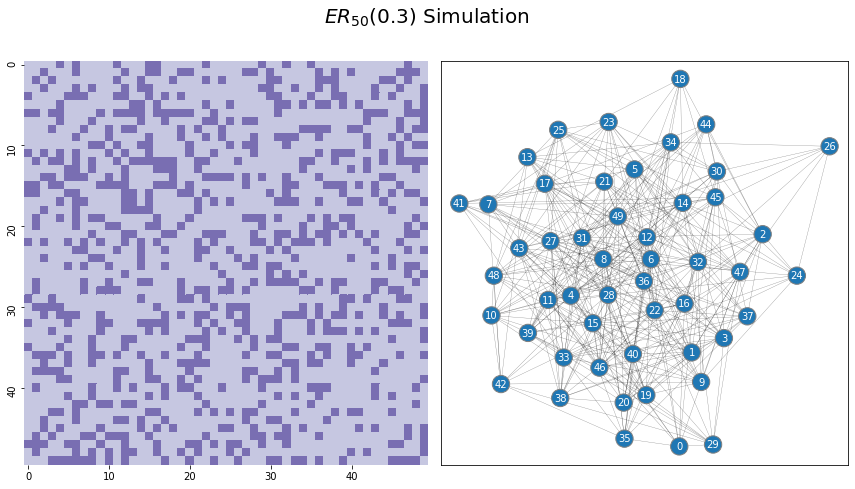

In [3]:
n = 50  # network with 50 nodes
p = 0.3  # probability of an edge existing is .3

# sample a single simple adjacency matrix from ER(50, .3)
A = er_np(n=n, p=p, directed=False, loops=False)

# and plot it
draw_multiplot(A, title="$ER_{50}(0.3)$ Simulation", xticklabels=10, yticklabels=10);

Above, we visualize the network using a heatmap. The dark squares indicate that an edge exists between a pair of nodes, and white squares indicate that an edge does not exist between a pair of nodes.

Next, let's see what happens when we use a higher edge probability, like $p=0.7$:

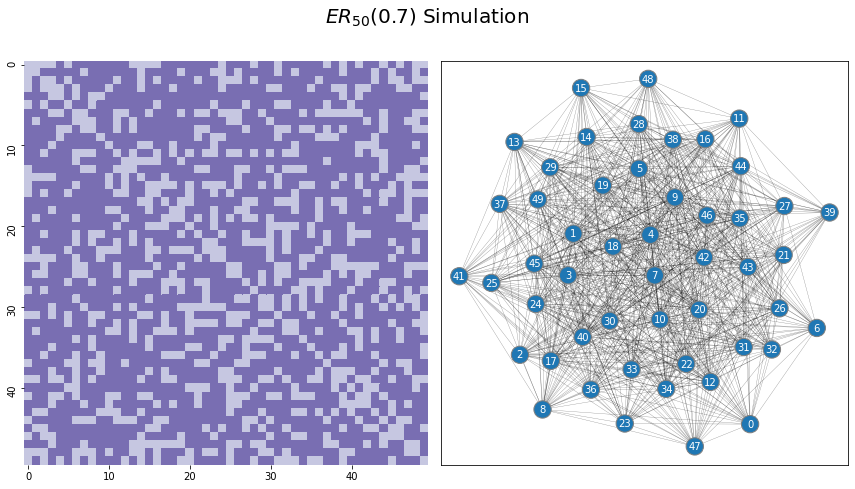

In [4]:
p = 0.7  # network has an edge probability of 0.7

# sample a single adjacency matrix from ER(50, 0.7)
A = er_np(n=n, p=p, directed=False, loops=False)

# and plot it
draw_multiplot(A, title="$ER_{50}(0.7)$ Simulation", xticklabels=10, yticklabels=10);

As the edge probability increases, the sampled adjacency matrix tends to indicate that there are more connections in the network. This is because there is a higher chance of an edge existing when $p$ is larger.


## Probability*

What is the probability for realizations of Erd&ouml;s-R&eacute;nyi networks? Remember that for Independent-edge graphs, that the probability can be written:

\begin{align*}
    \mathbb P_{\theta}(A) &= \prod_{j > i} \mathbb P_\theta(\mathbf{a}_{ij} = a_{ij})
\end{align*}

Next, we recall that by assumption of the ER model, that the probability matrix $P = (p)$, or that $p_{ij} = p$ for all $i,j$. Therefore:

\begin{align*}
    \mathbb P_\theta(A) &= \prod_{j > i} p^{a_{ij}}(1 - p)^{1 - a_{ij}} \\
    &= p^{\sum_{j > i} a_{ij}} \cdot (1 - p)^{\binom{n}{2} - \sum_{j > i}a_{ij}} \\
    &= p^{m} \cdot (1 - p)^{\binom{n}{2} - m}
\end{align*}

This means that the probability $\mathbb P_\theta(A)$ is a function *only* of the number of edges $m = \sum_{j > i}a_{ij}$ in the network represented by adjacency matrix $A$. The equivalence class on the Erd&ouml;s-R&eacute;nyi networks are the sets:

\begin{align*}
    E_{i} &= \left\{A \in \mathcal A_n : m = i\right\}
\end{align*}

where $i$ index from $0$ (the minimum number of edges possible) all the way up to $n^2$ (the maximum number of edges possible). All of the relationships for equivalence classes discussed above apply to the sets $E_i$.

## Network models for networks which aren't simple

To make the discussions a little more easy to handle, in the above descriptions and all our successive descriptions, we will describe network models for **simple networks**. To recap, networks which are simple are binary networks which are both loopless and undirected. Stated another way, simple networks are networks whose adjacency matrices are only $0$s and $1$s, they are hollow (the diagonal is entirely *0*), and symmetric (the lower and right triangles of the adjacency matrix are the *same*). What happens our networks don't quite look this way?

For now, we'll keep the assumption that the networks are binary, but we will discuss non-binary network models in a later chapter. We have three possibilities we can consider, and we will show how the "relaxations" of the assumptions change a description of a network model. A *relaxation*, in statistician speak, means that we are taking the assumptions that we had (in this case, that the networks are *simple*), and progressively making the assumptions weaker (more *relaxed*) so that they apply to other networks, too. We split these out so we can be as clear as possible about how the generative model changes with each relaxation step.

We will compare each relaxation to the statement about the generative model for the ER generative model. To recap, for a simple network, we wrote:

"Statistically, we say that for each edge $\mathbf{a}_{ij}$ for every pair of nodes where $j > i$ (in terms of the adjacency matrix, this means all of the nodes in the *upper right* triangle), that $\mathbf{a}_{ij}$ is sampled independently and identically from a *Bernoulli* distribution with probability $p$....  We assume here that the networks are undirected, which means that if an edge $\mathbf a_{ij}$ exists from node $i$ to $j$, then the edge $\mathbf a_{ji}$ also exists from node $j$ to node $i$. We also assume that the networks are loopless, which means that no edges $\mathbf a_{ii}$ can go from node $i$ to itself."

Any additional parts that are added are expressed in **<font color='green'>green</font>** font. Omitted parts are struck through with <font color='red'><strike>red</strike></font> font. 

Note that these generalizations apply to *any* of the successive networks which we describe in the Network Models section, and not just the ER model!

### Binary network model which has loops, but is undirected

Here, all we want to do is relax the assumption that the network is loopless. We simply ignore the statement that edges $\mathbf a_{ii}$ cannot exist, and allow that the $\mathbf a_{ij}$ which follow a Bernoulli distribution (with some probability which depends on the network model choice) *now* applies to $j \geq i$, and not just $j > i$. We keep that an edge $\mathbf a_{ij}$ existing implies that $\mathbf a_{ji}$ also exists, which maintains the symmetry of $\mathbf A$ (and consequently, the undirectedness of the network). 

Our description of the ER network changes to:

Statistically, we say that for each edge $\mathbf{a}_{ij}$ for every pair of nodes where $\mathbf{\color{green}{j \geq i}}$ (in terms of the adjacency matrix, this means all of the nodes in the *upper right* triangle **<font color='green'>and the diagonal</font>**), that $\mathbf{a}_{ij}$ is sampled independently and identically from a *Bernoulli* distribution with probability $p$....  We assume here that the networks are undirected, which means that if an edge $\mathbf a_{ij}$ exists from node $i$ to $j$, then the edge $\mathbf a_{ji}$ also exists from node $j$ to node $i$. <font color='red'><strike>We also assume that the networks are loopless, which means that no edges $\mathbf a_{ii}$ can go from node $i$ to itself.</strike></font>

### Binary network model which is loopless, but directed

Like above, we simply ignore the statement that $\mathbf a_{ji} = \mathbf a_{ij}$, which removes the symmetry of $\mathbf A$ (and consequently, removes the undirectedness of the network). We allow that the $\mathbf a_{ij}$ which follows a Bernoulli distribution now apply to $j \neq i$, and not just $j > i$. We keep that $\mathbf a_{ii} = 0$, which maintains the hollowness of $\mathbf A$ (and consequently, the undirectedness of the network). 

Our description of the ER network changes to:

Statistically, we say that for each edge $\mathbf{a}_{ij}$ for every pair of nodes where $\mathbf{\color{green}{j \neq i}}$ (in terms of the adjacency matrix, this means all of the nodes <strike><font color='red'>in the *upper right* triangle</font></strike>**<font color='green'>which are not along the diagonal</font>**), that $\mathbf{a}_{ij}$ is sampled independently and identically from a *Bernoulli* distribution with probability $p$....  <font color='red'><strike>We assume here that the networks are undirected, which means that if an edge $\mathbf a_{ij}$ exists from node $i$ to $j$, then the edge $\mathbf a_{ji}$ also exists from node $j$ to node $i$.</strike></font> We also assume that the networks are loopless, which means that no edges $\mathbf a_{ii}$ can go from node $i$ to itself.

### Binary network model which is has loops and is directed

Finally, for a network which has loops and is directed, we combine the above two approaches. We ignore the statements that $\mathbf a_{ji} = \mathbf a_{ij}$, and the statement that $\mathbf a_{ii} = 0$. 

Our descriptiomn of the ER network changes to:


Statistically, we say that for each edge $\mathbf{a}_{ij}$  <font color='red'><strike>where $j > i$ (in terms of the adjacency matrix, this means all of the nodes in the *upper right* triangle)</strike></font>, that $\mathbf{a}_{ij}$ is sampled independently and identically from a *Bernoulli* distribution with probability $p$, <font color='green'>for all possible combinations of nodes $j$ and $i$</font>. <font color='red'><strike>We assume here that the networks are undirected, which means that if an edge $\mathbf a_{ij}$ exists from node $i$ to $j$, then the edge $\mathbf a_{ji}$ also exists from node $j$ to node $i$. We also assume that the networks are loopless, which means that no edges $\mathbf a_{ii}$ can go from node $i$ to itself.</strike></font>

# References

[1] Erd&ouml;s P, R&eacute;nyi A. 1959. "On random graphs, I." Publ. Math. Debrecen 6:290–297.
